In [1]:
import numpy as np
from astropy.modeling.functional_models import Moffat2D
from scipy.signal import convolve2d
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import time

## FWHM of Moffat

In [2]:
FWHM = 0.7 # arcsec
alpha = FWHM/(2*np.sqrt(2**(1/5)-1))

In [3]:
alpha

np.float64(0.9076427903982326)

## Moffat psf

In [4]:
psf_range = 2
pix_size = 0.1

In [5]:
x_psf,y_psf = np.meshgrid(np.linspace(-psf_range, psf_range, int(2*psf_range/pix_size+1)), np.linspace(-psf_range, psf_range, int(2*psf_range/pix_size+1)))

In [6]:
moffat_kernel = Moffat2D().evaluate(x_psf, y_psf,amplitude=1, x_0=0, y_0=0, gamma=0.9, alpha=5)

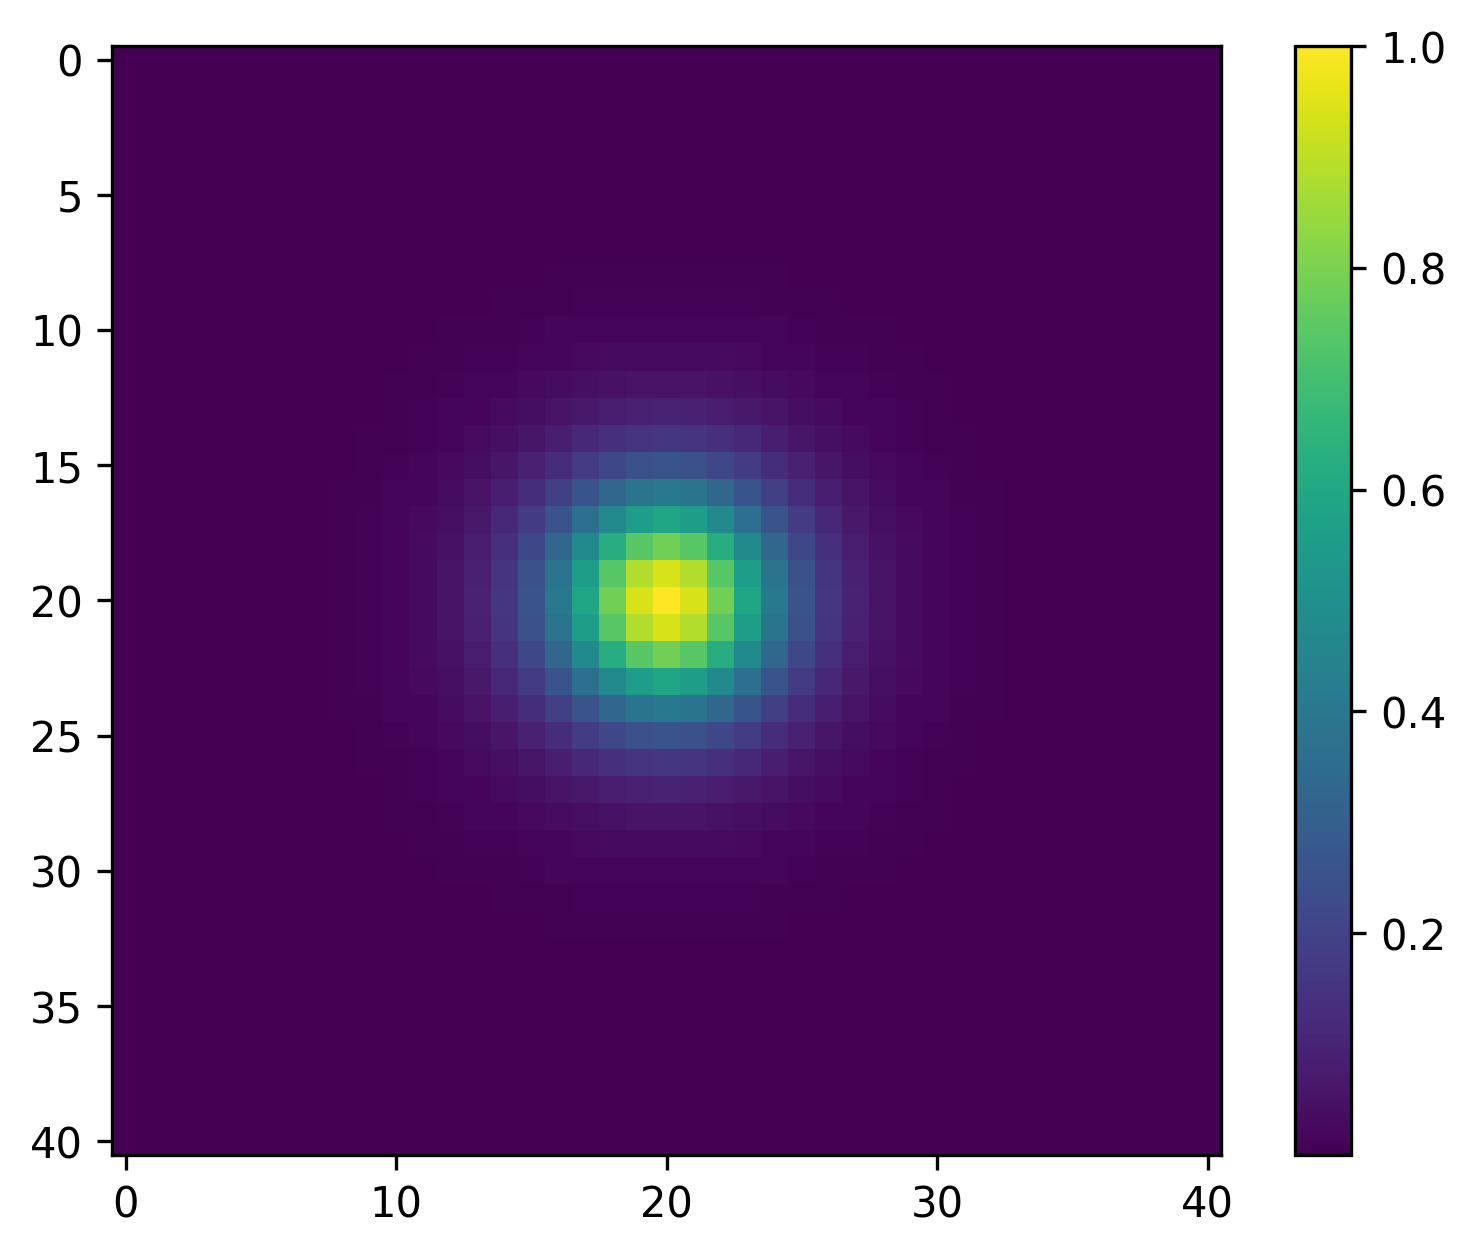

In [38]:
plt.figure(dpi = 300)
plt.imshow(moffat_kernel)
plt.colorbar()

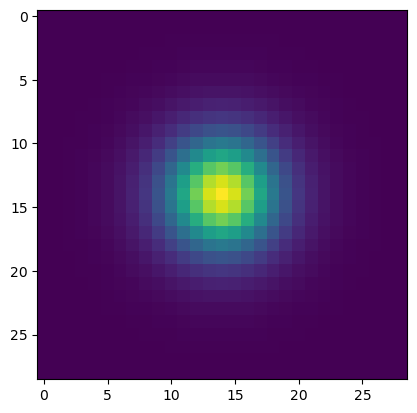

In [11]:
plt.imshow(Moffat2DKernel(9,5))

## Origin image

In [8]:
img_range = 5
image = np.zeros((int(2*img_range/pix_size+1),int(2*img_range/pix_size+1)))

In [13]:
images = np.genfromtxt('./out_point.dat')[1:]
flux = 1e-17
x_img = images[:,0]
y_img = images[:,1]
magnification= np.abs(images[:,2])
x_pix = 50+np.round(x_img/pix_size).astype(int)
y_pix = 50+np.round(y_img/pix_size).astype(int)

In [15]:
for i in range(len(x_pix)):
    image[y_pix[i],x_pix[i]]  = flux*magnification[i]

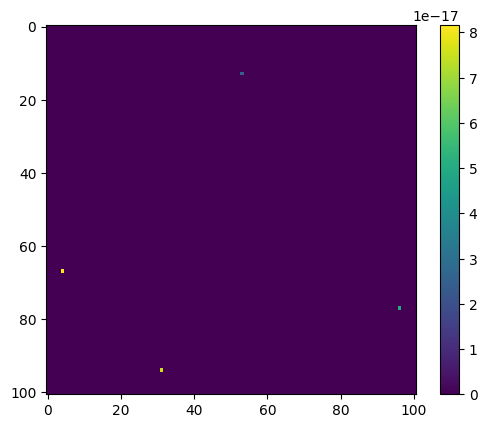

In [16]:
plt.imshow(image)
plt.colorbar()

## Convolved image

In [17]:
start = time.time()
image_conv = convolve2d(image, moffat_kernel, mode='same') 
print(time.time()-start)

0.031970977783203125


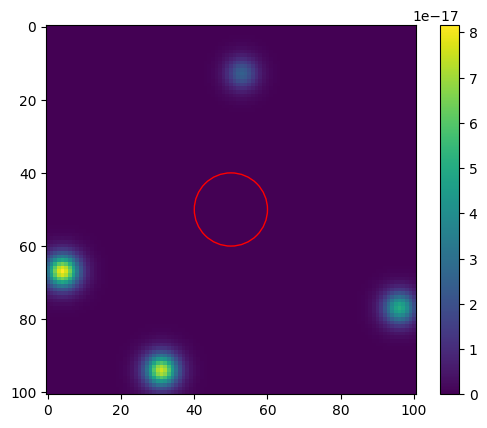

In [21]:
plt.imshow(image_conv)
plt.colorbar()
circle = plt.Circle((image_conv.shape[1]//2, image_conv.shape[0]//2), radius=10, color='r', fill=False)
plt.gca().add_patch(circle)

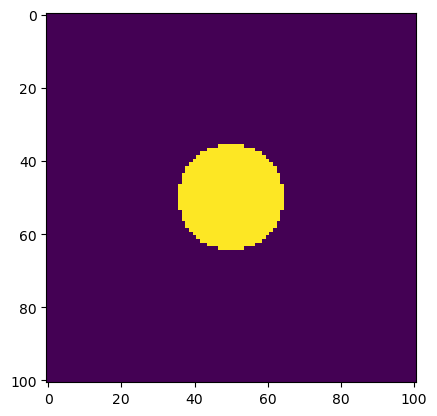

In [25]:
x_mesh_y_mesh  = np.meshgrid(np.linspace(-img_range, img_range, int(2*img_range/pix_size+1)), np.linspace(-img_range, img_range, int(2*img_range/pix_size+1)))
r_mesh = np.sqrt(x_mesh_y_mesh[0]**2+x_mesh_y_mesh[1]**2)
in_fiber = r_mesh < 1.45
plt.imshow(in_fiber)

In [27]:
f'{np.sum(image_conv[in_fiber])} photons in fiber'

'0.09486708239106337 photons in fiber'

## Astropy convolve

In [19]:
Moffat2DKernel(9,5)

In [20]:
start = time.time()
image_conv_astropy = convolve(image, Moffat2DKernel(10,5))
print(time.time()-start)

0.01018977165222168


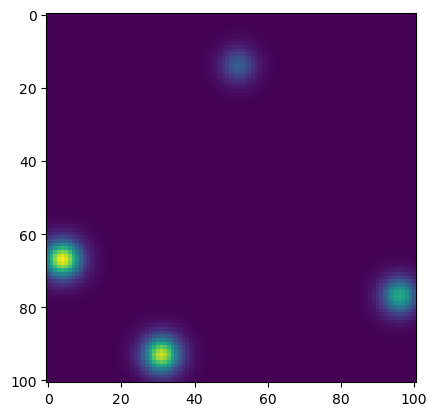

In [21]:
plt.imshow(image_conv_astropy)

## Mock Image

In [23]:
from astropy.io import fits
data = fits.open('../data/mock_image_ELCOSMOS_back/101_0.fits')

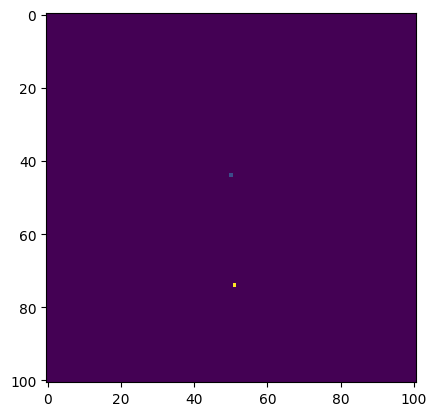

In [27]:
image1 = data[1].data
plt.imshow(image1)

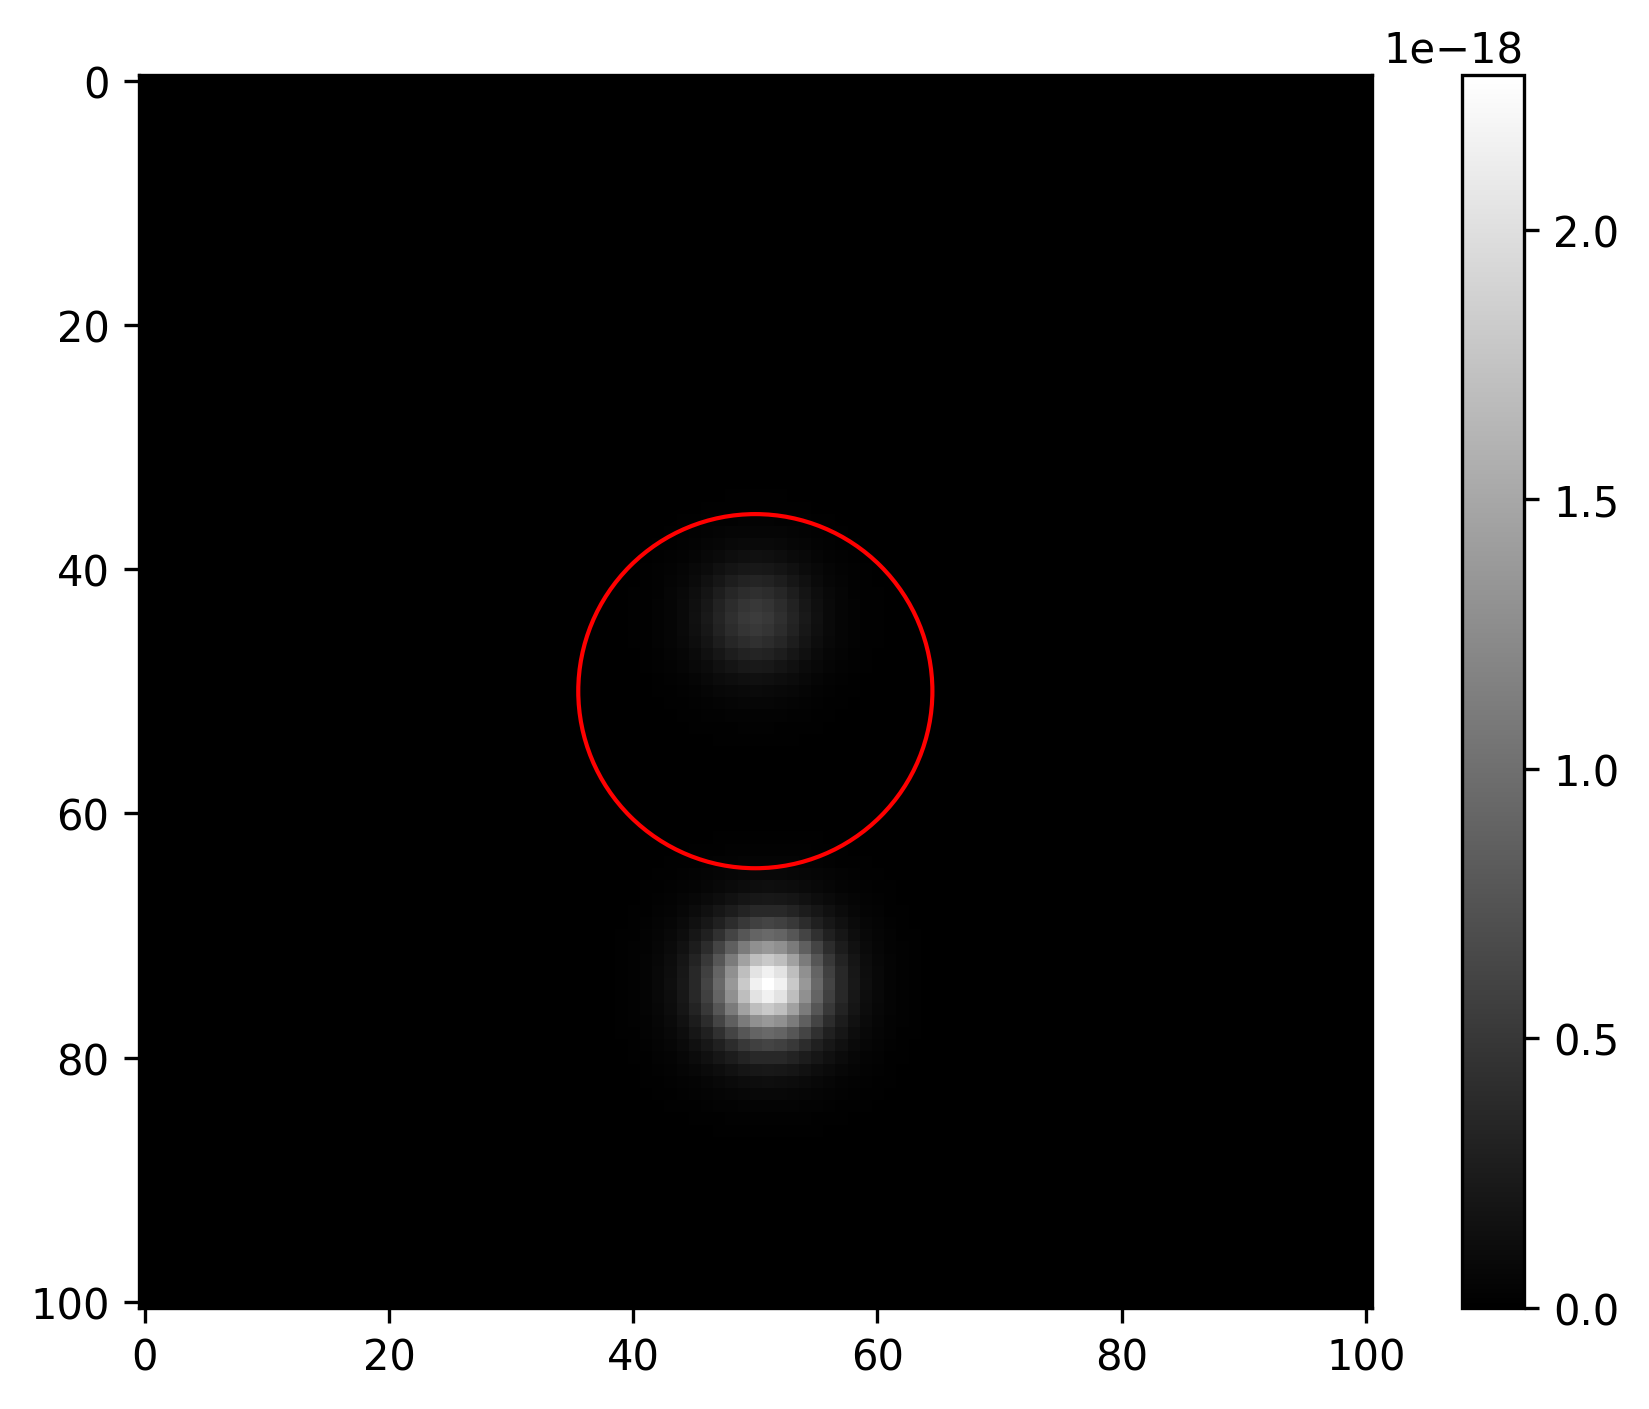

In [40]:
image2 = data[2].data
plt.figure(dpi=300)
plt.imshow(image2, cmap='gray')
plt.colorbar()
Circle = plt.Circle((image2.shape[1]//2, image2.shape[0]//2), radius=1.45/0.1, color='r', fill=False)
plt.gca().add_patch(Circle)
plt.tight_layout()